In [2]:
import numpy as np
from numpy.random import random as srand
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
oneMax = lambda x: np.sum(x, axis=0)
def deceptive_oneMax(x):
    vec_zero = np.sum(x == 0, axis=0) == x.shape[0]
    return vec_zero * x.shape[0] + (1 - vec_zero) * (np.sum(x, axis=0) - 1)


In [50]:
def pbil(F, d, N, th1, th2, th3, steps=500, **kwargs):
    
    def random_pop(p, d, N):
        population = srand((d, N))
        return population < p
    
    def get_score(scores):
        return np.max(scores), np.mean(scores), np.min(scores)
    
    
    plot_probs = []
    plot_scores = []
    
    p = np.ones((d, 1)) / 2
    population = random_pop(p, d, N)
    result = F(population)
    
    plot_probs.append(p)
    plot_scores.append(get_score(result))
    
    for _ in range(steps - 1):
        best = population[:, [np.argmax(result)]]
        p = p * (1 - th1) + best * th1
        
        if_change = srand((d,1)) < th2
        p = p * (1 - if_change) + (
            (if_change) * (
                p * (1 - th3)
                + (srand((d,1)) < 0.5) * th3
            )
        )

        population = random_pop(p, d, N)
        result = F(population)
        
        plot_probs.append(p)
        plot_scores.append(get_score(result))
    
    return np.array(plot_scores), np.array(plot_probs)

def plot_results(scores, probs, title=""):

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title + f' (max: {np.max(scores)})')
    for i in range(scores.shape[1]):
        axs[0].plot(range(scores.shape[0]), scores[:, i])
    
    for i in range(probs.shape[1]):
        axs[1].plot(range(probs.shape[0]), probs[:,i,0])
    plt.show()

In [53]:
def cga(F, d, theta, steps=500, **kwargs):
    N=2
    def random_pop(p, d, N):
        population = srand((d, N))
        return population < p
    
    def get_score(scores):
        return np.max(scores), np.mean(scores), np.min(scores)
    
    plot_probs = []
    plot_scores = []
    
    p = np.ones((d, 1)) / 2
    population = random_pop(p, d, N)
    result = F(population)
#     print(p.shape, population.shape)
    plot_probs.append(p.copy())
    plot_scores.append(get_score(result))
    
    for _ in range(steps - 1):
        best = population[:, [np.argmax(result)]]
        worst = population[:, [np.argmax(-result)]]
        p[np.logical_and(best == 1, best!=worst)] += theta
        p[np.logical_and(worst == 1, best!=worst)] -= theta
        population = random_pop(p, d, N)
        result = F(population)
        
        plot_probs.append(p.copy())
        plot_scores.append(get_score(result))
    
    return np.array(plot_scores), np.array(plot_probs)


In [55]:
def UMDA(F, d, N, M, steps=500, **kwargs):
    
    def random_pop(p, d, N):
        population = srand((d, N))
        return population < p
    
    def get_score(scores):
        return np.max(scores), np.mean(scores), np.min(scores)
    
    
    plot_probs = []
    plot_scores = []
    
    p = np.ones((d, 1)) / 2.
    population = random_pop(p, d, N)
    result = F(population)
    
    plot_probs.append(p.copy())
    plot_scores.append(get_score(result))

    for _ in range(steps - 1):
        P_S = population[:, np.argsort(result)][:, -M:]
        p = np.sum(P_S, axis=1)[:,np.newaxis] / (M)
#         print(p)

        population = random_pop(p, d, N)
        result = F(population)
        
        plot_probs.append(p.copy())
        plot_scores.append(get_score(result))
    
    return np.array(plot_scores), np.array(plot_probs)


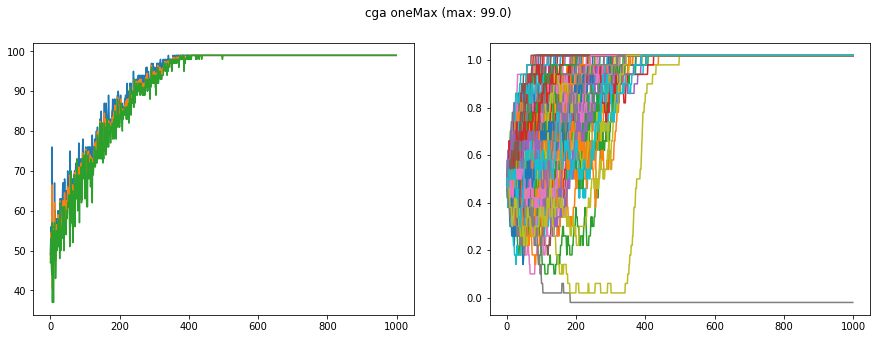

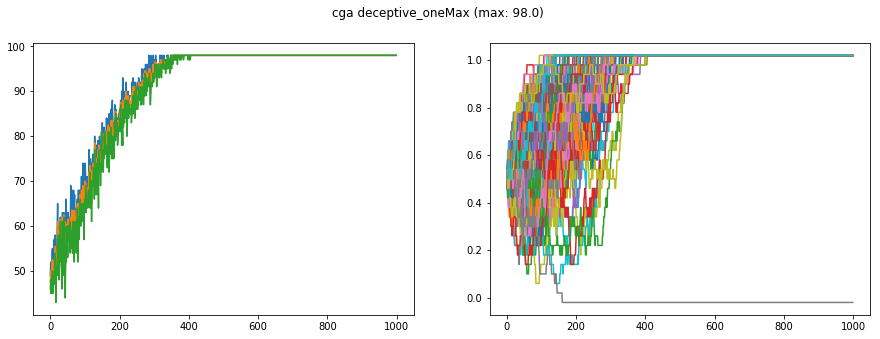

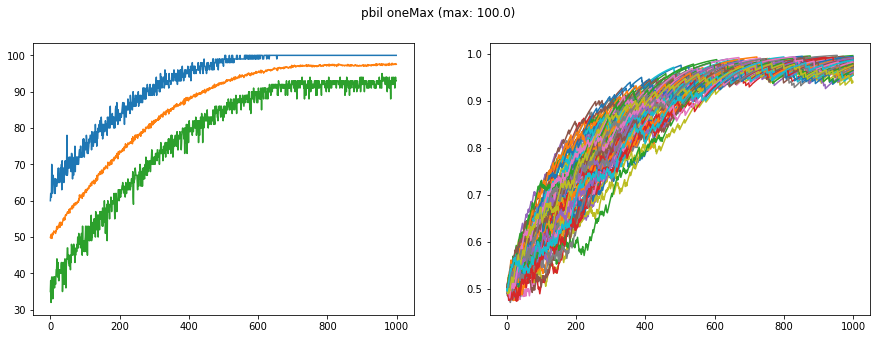

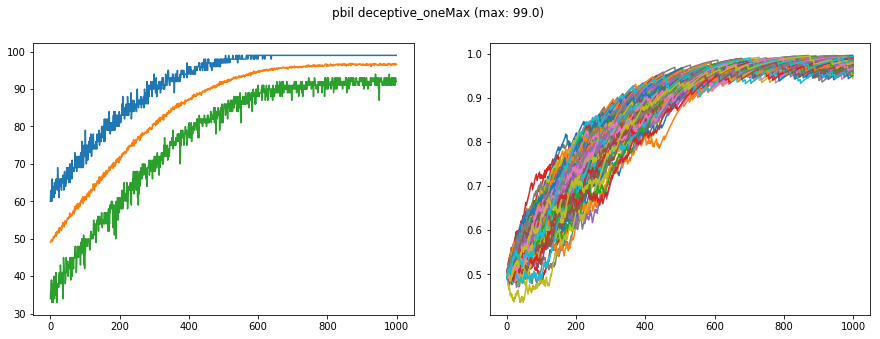

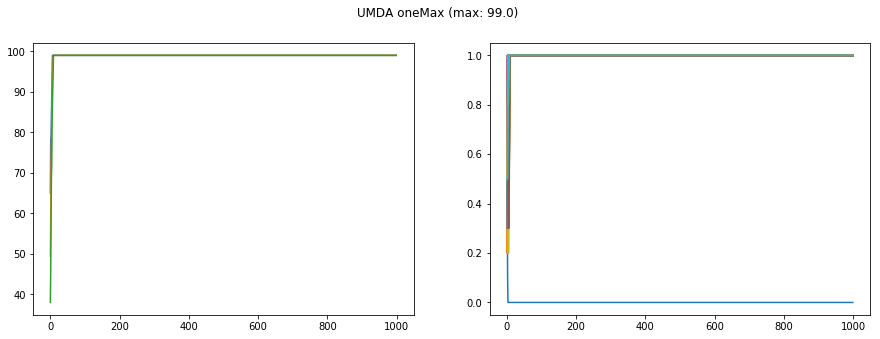

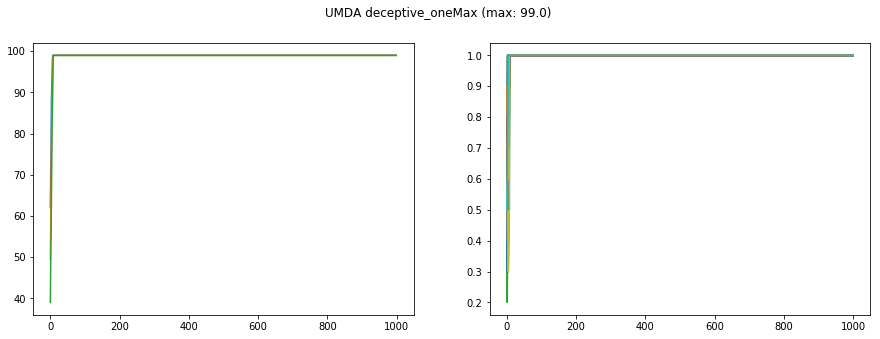

In [56]:
for alg in [cga, pbil, UMDA]: 
    for f in ["oneMax", "deceptive_oneMax"]:
        plot_results(*alg(F=eval(f), d=100, N=125, M=10, th1=0.01, th2=0.05, th3=0.01, steps=1000, theta=0.04),  alg.__name__ +' '+f)